In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pressao_vapor_perry = pd.read_csv("tabelas/pressao_vapor.csv")
lista_nomes = pressao_vapor_perry['Name'].tolist()

## Pressão de vapor

In [2]:

pressao_vapor_perry = pd.read_csv("pressao_vapor.csv")

def calc_pressao_vapor(compound: str):
    row_compound = pressao_vapor_perry[pressao_vapor_perry['Name'] == compound]
    C1 = row_compound['C1'].iloc[0]
    C2 = row_compound['C2'].iloc[0]
    C3 = row_compound['C3'].iloc[0]
    C4 = row_compound['C4'].iloc[0]
    C5 = row_compound['C5'].iloc[0]
    Tmin =row_compound['Tmin'].iloc[0]
    Tmax =row_compound['Tmax'].iloc[0]
    T_range = np.linspace(Tmin, Tmax, 2000)
    pressao_vapor = []
    for T in T_range:
        pressao_vapor.append(np.exp(C1 + C2/T + C3*np.log(T) + C4*(T**C5)))
    return T_range, pressao_vapor


## Densidade e volume molar

In [3]:
densidade_molar_perry = pd.read_csv("densidade_molar.csv")

def calc_density(compound: str):
    row_compound = densidade_molar_perry[densidade_molar_perry['Name'] == compound]
    C1 = row_compound['C1'].iloc[0]
    C2 = row_compound['C2'].iloc[0]
    C3 = row_compound['C3'].iloc[0]
    C4 = row_compound['C4'].iloc[0]
    Tmin =row_compound['Tmin'].iloc[0]
    Tmax =row_compound['Tmax'].iloc[0]
    T_range = np.linspace(Tmin, Tmax, 2000)
    densidade_molar = []
    volume_molar = []
    for T in T_range:
        if compound == 'Water' or compound == 'o-Terphenyl':
            densidade_molar.append(C1 + C2*T + C3*(T**2) + C4*(T**3))
            volume_molar.append(1/(C1 + C2*T + C3*(T**2) + C4*(T**3)))
        else:
            densidade_molar.append(C1/(C2**(1+(1-T/C3)**C4)))
            volume_molar.append(1/(C1/(C2**(1+(1-T/C3)**C4))))
    return T_range, densidade_molar, volume_molar


$$\Delta H_{vap}$$

In [17]:
entalpia_perry = pd.read_csv("tabelas/entalpia_vap.csv")
criticos_perry = pd.read_csv("tabelas/criticos.csv")

def calc_entalpia_vap(compound: str):
    row_compound = entalpia_perry[entalpia_perry['Name'] == compound]
    row_compound_criticos = criticos_perry[criticos_perry['Name'] == compound]
    Tc = float(row_compound_criticos['Tc'].iloc[0])
    C1 = float(row_compound['C1'].iloc[0])
    C2 = float(row_compound['C2'].iloc[0])
    C3 = float(row_compound['C3'].iloc[0])
    C4 = float(row_compound['C4'].iloc[0])
    Tmin =float(row_compound['Tmin'].iloc[0])
    Tmax =float(row_compound['Tmax'].iloc[0])
    T_range = np.linspace(Tmin, Tmax, 2000)
    entalpia_vap = []
    for T in T_range:
        entalpia_vap.append(C1*(1-T/Tc)**(C2+C3*T/Tc+C4*(T/Tc)**2))
    return T_range, entalpia_vap

In [19]:
x,y = calc_entalpia_vap('Water')

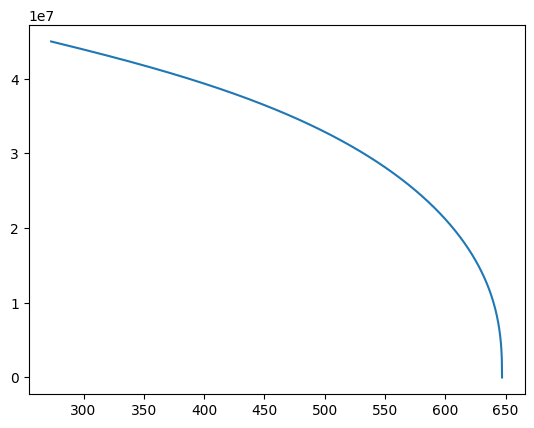

In [20]:
plt.plot(x,y)